<a href="https://colab.research.google.com/github/sivasamy1/data_analytics/blob/main/Open_crime_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -ltr /content/drive/MyDrive | grep *.csv

ls: /content/drive/MyDrive/DataSheets: No such file or directory
ls: '/content/drive/MyDrive/Build Club docs': No such file or directory


In [ ]:
!ls -ltr /content/drive/MyDrive/data_analytics/MINIPROJECT_7/2019-07/

total 15800
-r-------- 1 root root  202233 Feb 23  2022 2019-07-city-of-london-street.csv
-r-------- 1 root root  907269 Feb 23  2022 2019-07-cumbria-street.csv
-r-------- 1 root root  820660 Feb 23  2022 2019-07-dyfed-powys-street.csv
-r-------- 1 root root  834559 Feb 23  2022 2019-07-btp-street.csv
-r-------- 1 root root 1041027 Feb 23  2022 2019-07-warwickshire-street.csv
-r-------- 1 root root  724019 Feb 24  2022 2019-07-cumbria-outcomes.csv
-r-------- 1 root root  140007 Feb 24  2022 2019-07-city-of-london-outcomes.csv
-r-------- 1 root root  455315 Feb 24  2022 2019-07-lincolnshire-outcomes.csv
-r-------- 1 root root  598219 Feb 24  2022 2019-07-gwent-outcomes.csv
-r-------- 1 root root  697404 Feb 24  2022 2019-07-gloucestershire-outcomes.csv
-r-------- 1 root root  565893 Feb 24  2022 2019-07-dyfed-powys-outcomes.csv
-r-------- 1 root root  410810 Feb 24  2022 2019-07-north-yorkshire-outcomes.csv
-r-------- 1 root root  780830 Feb 24  2022 2019-07-north-wales-outcomes.csv
-r-

In [1]:
import os
import pandas as pd
from tabulate import tabulate
df = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_7/2019-07/2019-07-merseyside-stop-and-search.csv')

print(tabulate(df.head(10), headers='keys', tablefmt='github'))

|    | Type                      | Date                      |   Part of a policing operation |   Policing operation |   Latitude |   Longitude | Gender   | Age range   | Self-defined ethnicity                                | Officer-defined ethnicity   | Legislation                                       | Object of search         | Outcome                      |   Outcome linked to object of search | Removal of more than just outer clothing   |
|----|---------------------------|---------------------------|--------------------------------|----------------------|------------|-------------|----------|-------------|-------------------------------------------------------|-----------------------------|---------------------------------------------------|--------------------------|------------------------------|--------------------------------------|--------------------------------------------|
|  0 | Person search             | 2019-06-30T23:51:09+00:00 |                            nan |   

## **PART I**

### **1.1 Top 10 Type by number events. Type column is the event (see sample data in the end of this document ).**
### **Output:**
### **type, num_events, rank**


In [10]:
df_num = df.groupby('Type').size().to_frame('num_events').reset_index()
df_num['rank'] = df_num['num_events'].rank(ascending=False)
df_num = df_num.sort_values(by='rank', ascending=True)
print(tabulate(df_num, headers='keys', tablefmt='github'))

|    | Type                      |   num_events |   rank |
|----|---------------------------|--------------|--------|
|  1 | Person search             |         2763 |      1 |
|  0 | Person and Vehicle search |          474 |      2 |
|  2 | Vehicle search            |           49 |      3 |


### **1.2 Top 10 Ethnics by number events. Use column “Officer-defined ethnicity”**
### **Output:**
### **type, ethnicity, office_num_events, office_ethnic_rank**


In [23]:
df_eth1 = df.groupby(['Type', 'Officer-defined ethnicity']).size().to_frame('office_num_events').reset_index()
df_eth1['office_ethnic_rank'] = df_eth1['office_num_events'].rank(ascending=False)
print(tabulate(df_eth1, headers='keys', tablefmt='github'))

|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank |
|----|---------------------------|-----------------------------|---------------------|----------------------|
|  0 | Person and Vehicle search | Asian                       |                   7 |                    7 |
|  1 | Person and Vehicle search | Black                       |                  23 |                    5 |
|  2 | Person and Vehicle search | Other                       |                   5 |                    8 |
|  3 | Person and Vehicle search | White                       |                 427 |                    2 |
|  4 | Person search             | Asian                       |                  22 |                    6 |
|  5 | Person search             | Black                       |                 113 |                    3 |
|  6 | Person search             | Other                       |                  24 |                    4 |
|  7 | Per

### **1.3 Top 10 Ethnics by number events. Use column “Self-defined ethnicity”**
### **Output:**
### **type, self_num_events, self_ethnic_rank**


In [22]:
df_eth2 = df.groupby(['Type', 'Self-defined ethnicity']).size().to_frame('self_num_events').reset_index()
df_eth2['self_ethnic_rank'] = df_eth2['self_num_events'].rank(ascending=False)
df_eth2 = df_eth2.sort_values(by='self_ethnic_rank').head(10).reset_index(drop=True)
print(tabulate(df_eth2, headers='keys', tablefmt='github'))

|    | Type                      | Self-defined ethnicity                                                               |   self_num_events |   self_ethnic_rank |
|----|---------------------------|--------------------------------------------------------------------------------------|-------------------|--------------------|
|  0 | Person search             | White - English/Welsh/Scottish/Northern Irish/British                                |              2212 |                  1 |
|  1 | Person and Vehicle search | White - English/Welsh/Scottish/Northern Irish/British                                |               387 |                  2 |
|  2 | Person search             | Other ethnic group - Not stated                                                      |               321 |                  3 |
|  3 | Person search             | White - Any other White background                                                   |                60 |                  4 |
|  4 | Person and Vehi

### **1.4 Merge 2 and 3 above on type.**
### **Output:**
### **type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank**


In [31]:
df_merge = df_eth1.merge(df_eth2, on=['Type'])
#df_merge = df_merge[['Type', 'office_num_events', 'office_ethnic_rank', 'self_num_events', 'self_ethnic_rank']]
print(tabulate(df_merge, headers='keys', tablefmt='github'))

|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank | Self-defined ethnicity                                                               |   self_num_events |   self_ethnic_rank |
|----|---------------------------|-----------------------------|---------------------|----------------------|--------------------------------------------------------------------------------------|-------------------|--------------------|
|  0 | Person and Vehicle search | Asian                       |                   7 |                    7 | White - English/Welsh/Scottish/Northern Irish/British                                |               387 |                  2 |
|  1 | Person and Vehicle search | Asian                       |                   7 |                    7 | Other ethnic group - Not stated                                                      |                42 |                  5 |
|  2 | Person and Vehicle search | Black        

### **1.5 Top 10 Type by Gender = Male.**
### **Output:**
### **type, num_events_men, rank_men**


In [32]:
df_male = df[df['Gender'] == 'Male']
df_male = df_male.groupby(['Type']).size().to_frame('num_events_men').reset_index()
df_male['rank_men'] = df_male['num_events_men'].rank(ascending=False)
df_male = df_male.sort_values(by='rank_men').reset_index(drop=True)
print(tabulate(df_male, headers='keys', tablefmt='github'))

|    | Type                      |   num_events_men |   rank_men |
|----|---------------------------|------------------|------------|
|  0 | Person search             |             2498 |          1 |
|  1 | Person and Vehicle search |              433 |          2 |


### **1.6 type, num_events_men, rank_men**
### **Top 10 Type by Gender = Female.**
### **Output:**
### **type, num_events_men, rank_women**


In [34]:
df_female = df[df['Gender'] == 'Female']
df_female = df_female.groupby(['Type']).size().to_frame('num_events_women').reset_index()
df_female['rank_women'] = df_female['num_events_women'].rank(ascending=False)
df_female = df_female.sort_values(by='rank_women').reset_index(drop=True)
print(tabulate(df_female, headers='keys', tablefmt='github'))

|    | Type                      |   num_events_women |   rank_women |
|----|---------------------------|--------------------|--------------|
|  0 | Person search             |                182 |            1 |
|  1 | Person and Vehicle search |                 29 |            2 |


### **1.7 Group bar chart plot (vertical) with output from 5 and 6.**
### **Bar 1 -> Male**
### **Bar 2 -> Female**


|    | Type                      | Gender   |   num_events |   rank |
|----|---------------------------|----------|--------------|--------|
|  0 | Person search             | Male     |         2498 |      1 |
|  1 | Person and Vehicle search | Male     |          433 |      2 |
|  2 | Person search             | Female   |          182 |      3 |
|  3 | Person and Vehicle search | Female   |           29 |      4 |


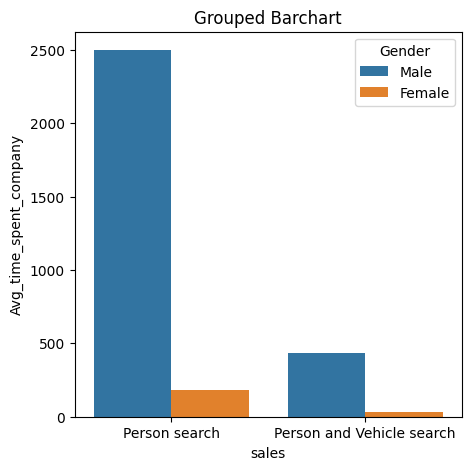

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

combined = df.groupby(['Type', 'Gender']).size().to_frame('num_events').reset_index()
combined['rank'] = combined['num_events'].rank(ascending=False)
combined = combined.sort_values(by='rank').reset_index(drop=True)
print(tabulate(combined, headers='keys', tablefmt='github'))
plt.figure(figsize=(5, 5))
sns.barplot(data=combined, x='Type', y='num_events', hue='Gender')
plt.title('Grouped Barchart')
plt.xlabel('sales')
plt.ylabel('Avg_time_spent_company')

plt.show()